# Evolutionary algorithm

## 1. Install dependencies

In [188]:
# %pip install numpy pandas matplotlib

## 2. Declaration of functions to optimize

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [190]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def ackley(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + 20 + np.e

## 2. Creating algorithm

### 2.1 Useful functions

In [191]:
def calculate_scores(population, function):
    return np.array([function(gen) for gen in population])

In [192]:
def selection(population, fitness_scores):
    inverted_fitness_scores = 1 / (fitness_scores + 1e-6)
    total_fitness = np.sum(inverted_fitness_scores)
    selection_probabilities = inverted_fitness_scores / total_fitness
    
    parents_indices = np.random.choice(np.arange(len(population)), size=len(population), p=selection_probabilities)
    parents = population[parents_indices]
    return parents

In [193]:
def crossover(parents, pc):
    children = np.zeros_like(parents)
    for i in range(len(parents)):
        if np.random.rand() < pc:
            parent1 = parents[i]
            parent2 = parents[np.random.randint(len(parents))]
            children[i] = np.array([parent1[0], parent2[1]])
        else:
            children[i] = parents[i]
    return children

In [194]:
def mutate(children, pm, distance=0.1):
    for i in range(len(children)):
        for j in range(2):
            if np.random.rand() < pm:
                cur = children[i][j]
                children[i][j] = np.random.uniform(cur - distance, cur + distance)
    return children

### 2.2 Algorithm implementation

In [195]:
def evolutionary_algorithm(function, base_length=1000, max_iter=1000, pm=0.01, pc=0.7):

    population = np.random.uniform(-100, 100, size=(base_length, 2))
    best_solutions = []
    best_scores = []
    mean_scores = []

    for i in range(max_iter):
        # Rating individuals
        fitness_scores = calculate_scores(population, function)

        # Parent selection
        parents = selection(population, fitness_scores)

        # Crossover
        children = crossover(parents, pc)

        # Mutation and succession
        population = mutate(children, pm)
    
        solution = population[np.argmin(calculate_scores(population, function))]
        solution_score = function(solution)
        mean_score = np.mean(calculate_scores(population, function))
        best_solutions.append(solution)
        best_scores.append(solution_score)
        mean_scores.append(mean_score)

        if i % (max_iter // 10) == 0 and i > 0:
            print(f"Simulating generation {i}. This generation info:")
            print(f"Lowest score: {solution_score}\nBest solution: {solution}")

    final_solution_id = np.argmin(best_scores)
    final_solution = best_solutions[final_solution_id]
    final_score = best_scores[final_solution_id]

    print(f"\nBest solution: {final_solution}\nScore: {final_score}\nGeneration: {final_solution_id}")
    return best_solutions, best_scores, mean_scores


## 3. Application on functions

#### Useful functions

In [196]:
def plot_scores(best_scores, mean_scores):
    fig, axs = plt.subplots(2, figsize=(12, 8))
    axs[0].plot(best_scores, color='r')
    axs[0].set_yscale('log')
    axs[0].set_title('Best scores')

    axs[1].plot(mean_scores, color='b')
    axs[1].set_yscale('log')
    axs[1].set_title('Mean scores')
    plt.xlabel('Generations')
    plt.ylabel('Scores')

### 3.1 Himmelblau's function

#### Default parameters

In [197]:
base_lenght = 1000
max_iter = 1000
pm = 0.01
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 8.748531106427017e-06
Best solution: [-3.77961934 -3.28357164]


Simulating generation 200. This generation info:
Lowest score: 1.2798164489770597e-06
Best solution: [-3.77946471 -3.28323953]
Simulating generation 300. This generation info:
Lowest score: 3.8736438131156165e-07
Best solution: [-3.77925502 -3.28323953]
Simulating generation 400. This generation info:
Lowest score: 3.8736438131156165e-07
Best solution: [-3.77925502 -3.28323953]
Simulating generation 500. This generation info:
Lowest score: 3.8736438131156165e-07
Best solution: [-3.77925502 -3.28323953]
Simulating generation 600. This generation info:
Lowest score: 3.8736438131156165e-07
Best solution: [-3.77925502 -3.28323953]
Simulating generation 700. This generation info:
Lowest score: 1.7319168447190963e-07
Best solution: [-3.77925502 -3.28318309]
Simulating generation 800. This generation info:
Lowest score: 1.7319168447190963e-07
Best solution: [-3.77925502 -3.28318309]
Simulating generation 900. This generation info:
Lowest score: 1.7319168447190963e-07
Best solution: [-3.779255

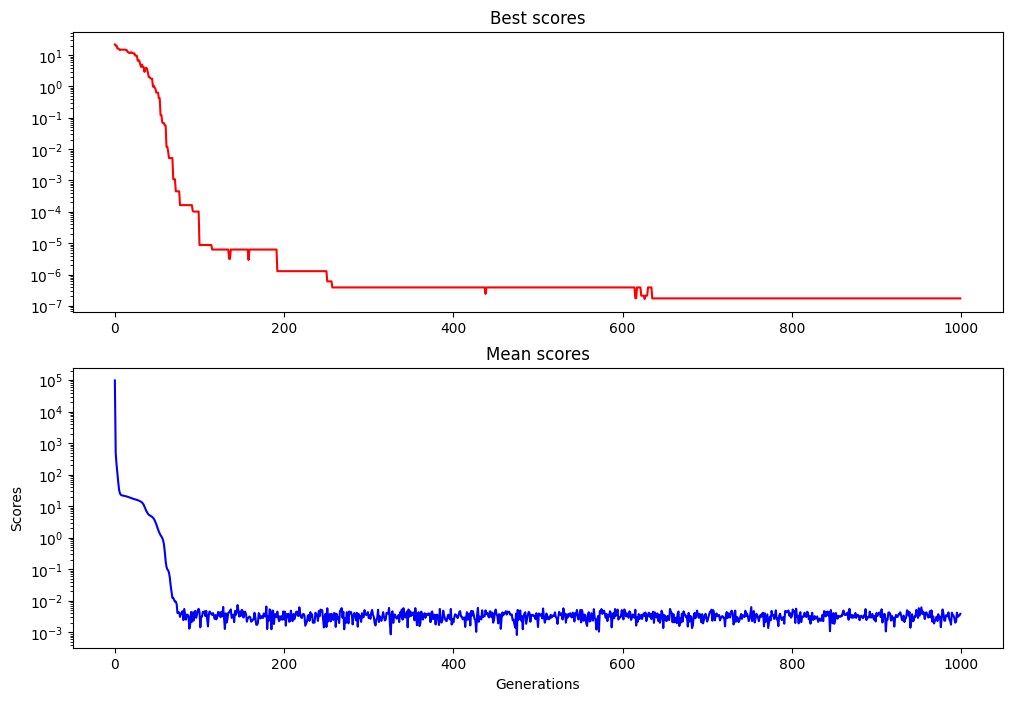

In [198]:
plot_scores(best_scores, mean_scores)

#### Different `base_length`

In [199]:
base_lenght = 100
max_iter = 1000
pm = 0.01
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 1038.254169270684
Best solution: [-3.08643127  6.47441202]
Simulating generation 200. This generation info:
Lowest score: 883.7223253251151
Best solution: [-3.15658801  6.27838778]
Simulating generation 300. This generation info:
Lowest score: 880.848515007177
Best solution: [-3.27710747  6.27223833]
Simulating generation 400. This generation info:
Lowest score: 794.2272469352014
Best solution: [-3.23935176  6.15224428]
Simulating generation 500. This generation info:
Lowest score: 751.9564681830598
Best solution: [-3.27781027  6.08868895]
Simulating generation 600. This generation info:
Lowest score: 680.3796319614383
Best solution: [-3.26019125  5.97784107]
Simulating generation 700. This generation info:
Lowest score: 638.9768376714037
Best solution: [-3.26019125  5.90965041]
Simulating generation 800. This generation info:
Lowest score: 508.9276726287898
Best solution: [-3.26019125  5.67341653]
Simulating generation 900

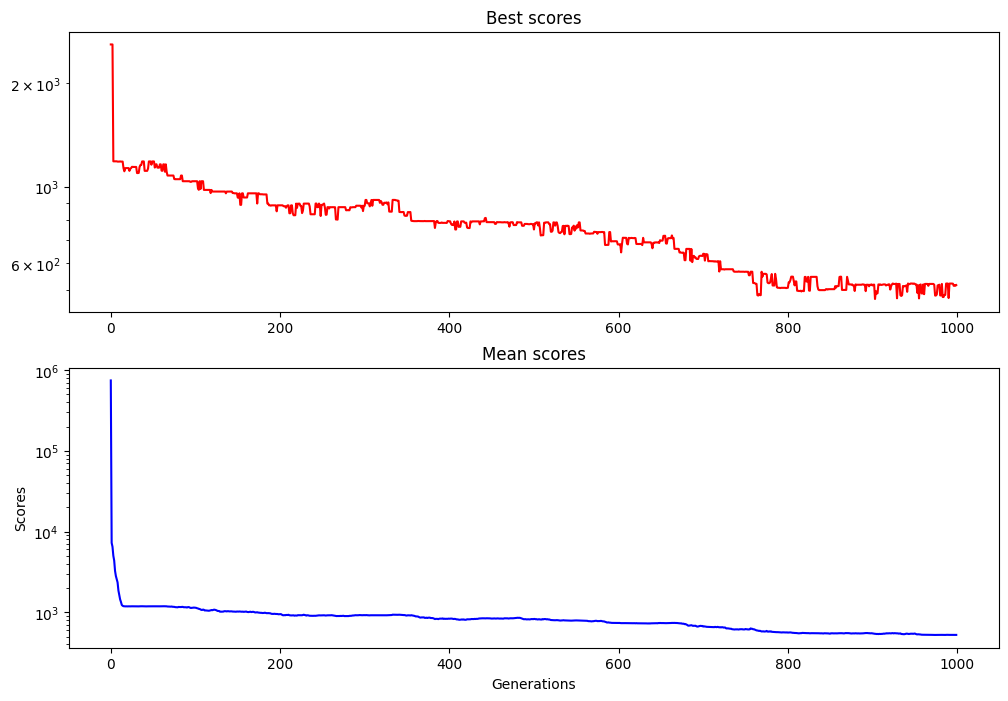

In [200]:
plot_scores(best_scores, mean_scores)

In [201]:
base_lenght = 10000
max_iter = 1000
pm = 0.01
pc = 0.9

solutions, scores, mean_scores = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 7.657097566146104e-08
Best solution: [-2.80511735  3.13126888]
Simulating generation 200. This generation info:
Lowest score: 7.974299868632665e-08
Best solution: [-2.80510733  3.13126888]
Simulating generation 300. This generation info:
Lowest score: 7.974299868632665e-08
Best solution: [-2.80510733  3.13126888]
Simulating generation 400. This generation info:
Lowest score: 1.9581748407927496e-08
Best solution: [-2.80510733  3.13133218]
Simulating generation 500. This generation info:
Lowest score: 1.9581748407927496e-08
Best solution: [-2.80510733  3.13133218]
Simulating generation 600. This generation info:
Lowest score: 9.907557489992294e-09
Best solution: [-2.80510733  3.13129998]
Simulating generation 700. This generation info:
Lowest score: 3.911304824631032e-09
Best solution: [-2.80510733  3.13131429]
Simulating generation 800. This generation info:
Lowest score: 8.996882275396093e-09
Best solution: [-2.80510733  3.

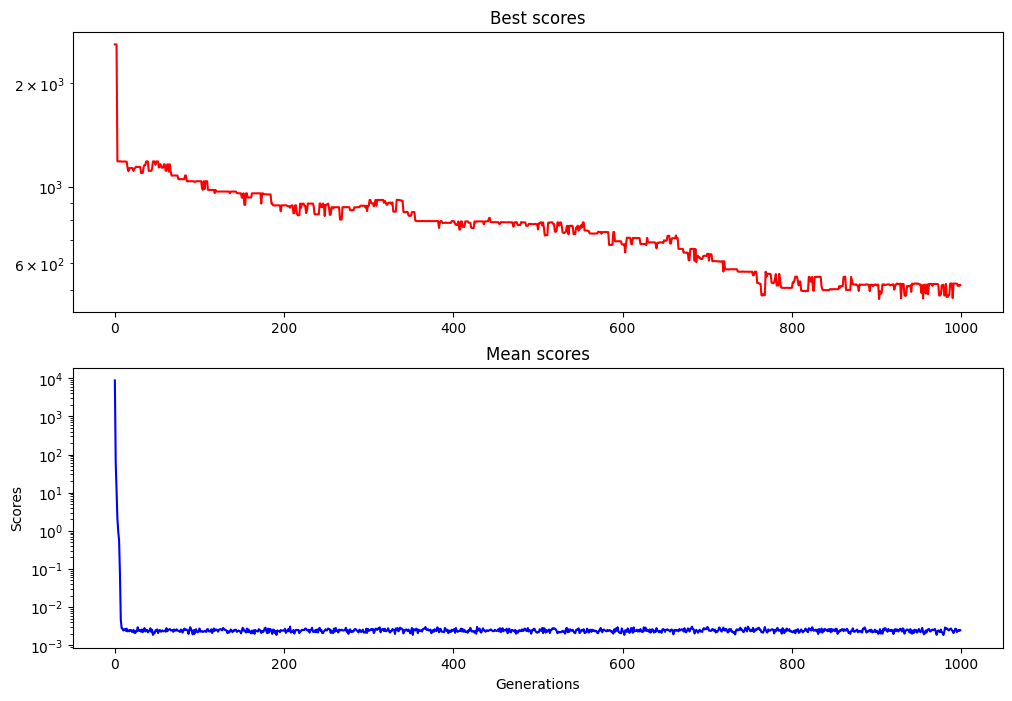

In [202]:
plot_scores(best_scores, mean_scores)

#### Different `max_iter`

In [203]:
base_lenght = 1000
max_iter = 10000
pm = 0.01
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc)

Simulating generation 1000. This generation info:
Lowest score: 3.8338696649636385e-08
Best solution: [2.99998805 2.00005168]
Simulating generation 2000. This generation info:
Lowest score: 3.8338696649636385e-08
Best solution: [2.99998805 2.00005168]
Simulating generation 3000. This generation info:
Lowest score: 3.8338696649636385e-08
Best solution: [2.99998805 2.00005168]
Simulating generation 4000. This generation info:
Lowest score: 3.8338696649636385e-08
Best solution: [2.99998805 2.00005168]
Simulating generation 5000. This generation info:
Lowest score: 3.8338696649636385e-08
Best solution: [2.99998805 2.00005168]
Simulating generation 6000. This generation info:
Lowest score: 3.8338696649636385e-08
Best solution: [2.99998805 2.00005168]
Simulating generation 7000. This generation info:
Lowest score: 3.8338696649636385e-08
Best solution: [2.99998805 2.00005168]
Simulating generation 8000. This generation info:
Lowest score: 3.8338696649636385e-08
Best solution: [2.99998805 2.00

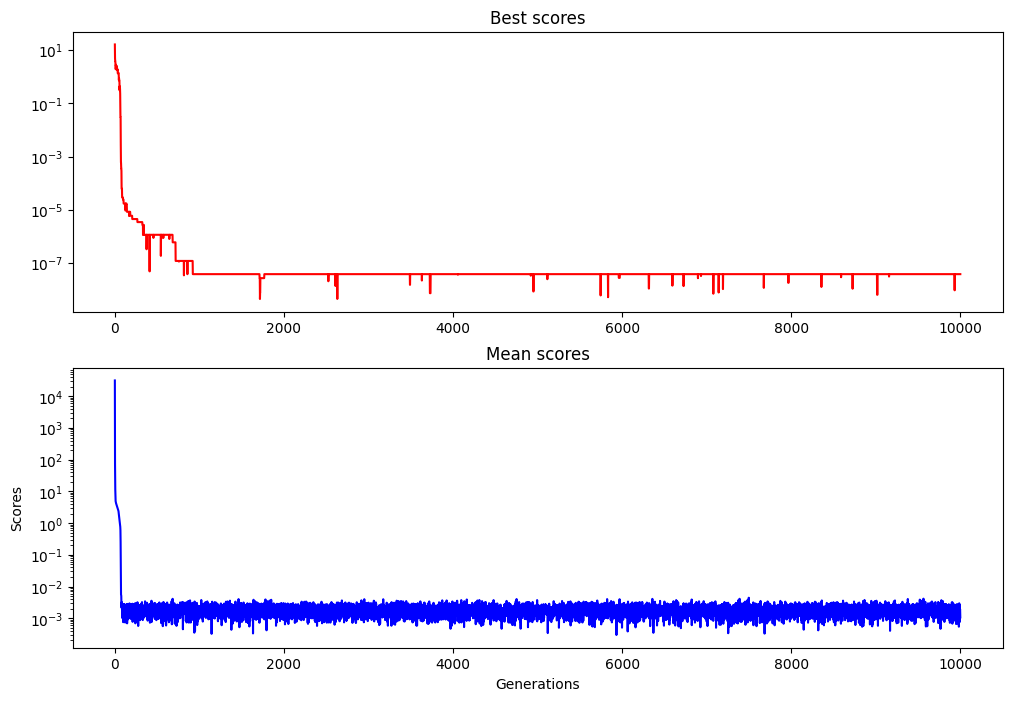

In [204]:
plot_scores(best_scores, mean_scores)

In [205]:
base_lenght = 1000
max_iter = 100
pm = 0.01
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc)

Simulating generation 10. This generation info:
Lowest score: 10.89645431209975
Best solution: [2.3370952 2.3464718]
Simulating generation 20. This generation info:
Lowest score: 8.491121128948446
Best solution: [2.42758148 2.3464718 ]
Simulating generation 30. This generation info:
Lowest score: 7.001428431267987
Best solution: [2.49043494 2.3464718 ]
Simulating generation 40. This generation info:
Lowest score: 6.3337994628501715
Best solution: [2.52109425 2.3464718 ]
Simulating generation 50. This generation info:
Lowest score: 4.780788379133375
Best solution: [2.58823094 2.30127922]
Simulating generation 60. This generation info:
Lowest score: 2.789917787400868
Best solution: [2.70435629 2.27941319]
Simulating generation 70. This generation info:
Lowest score: 1.7659642238407667
Best solution: [2.80011899 2.27941319]
Simulating generation 80. This generation info:
Lowest score: 0.8094819948932541
Best solution: [2.84883511 2.1665332 ]
Simulating generation 90. This generation info:

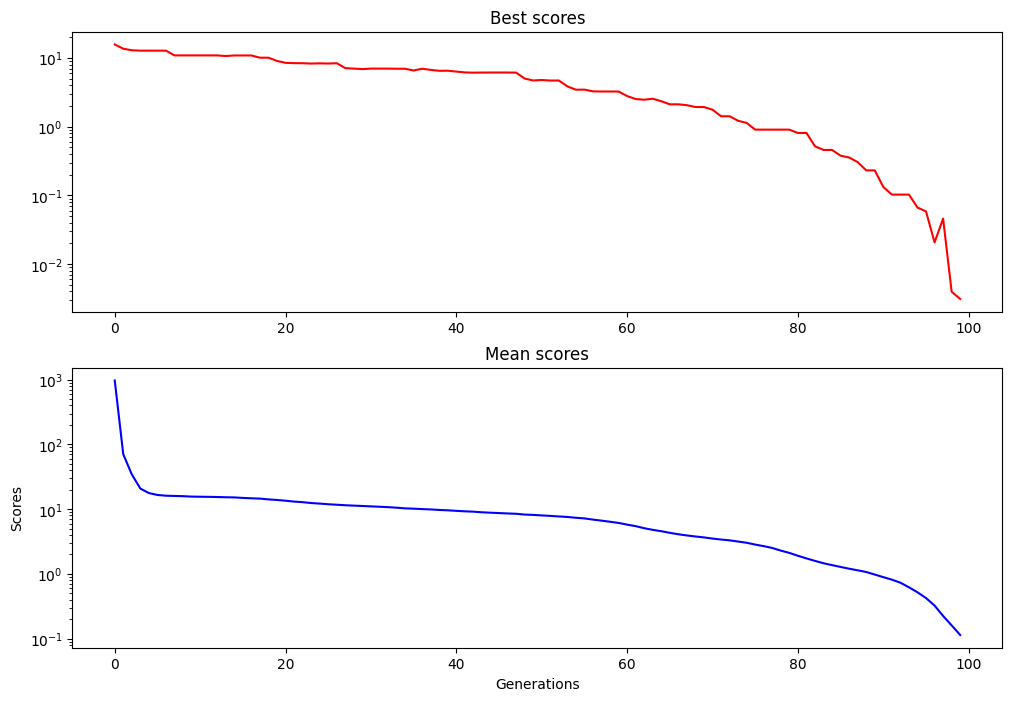

In [206]:
plot_scores(best_scores, mean_scores)

#### Different `pm` - probability of mutation

In [207]:
base_lenght = 1000
max_iter = 1000
pm = 0.5
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 3.632005594117162e-08
Best solution: [2.99997519 2.00004637]
Simulating generation 200. This generation info:
Lowest score: 3.632005594117162e-08
Best solution: [2.99997519 2.00004637]
Simulating generation 300. This generation info:
Lowest score: 3.0742231926323605e-08
Best solution: [2.99998728 2.00004637]
Simulating generation 400. This generation info:
Lowest score: 1.9211365441117232e-08
Best solution: [2.99997519 2.0000128 ]
Simulating generation 500. This generation info:
Lowest score: 3.632005594117162e-08
Best solution: [2.99997519 2.00004637]
Simulating generation 600. This generation info:
Lowest score: 2.2950743559382457e-08
Best solution: [2.99997519 2.00002953]
Simulating generation 700. This generation info:
Lowest score: 1.9164216840141267e-08
Best solution: [2.99997519 2.00001393]
Simulating generation 800. This generation info:
Lowest score: 1.9164216840141267e-08
Best solution: [2.99997519 2.00001393]
Sim

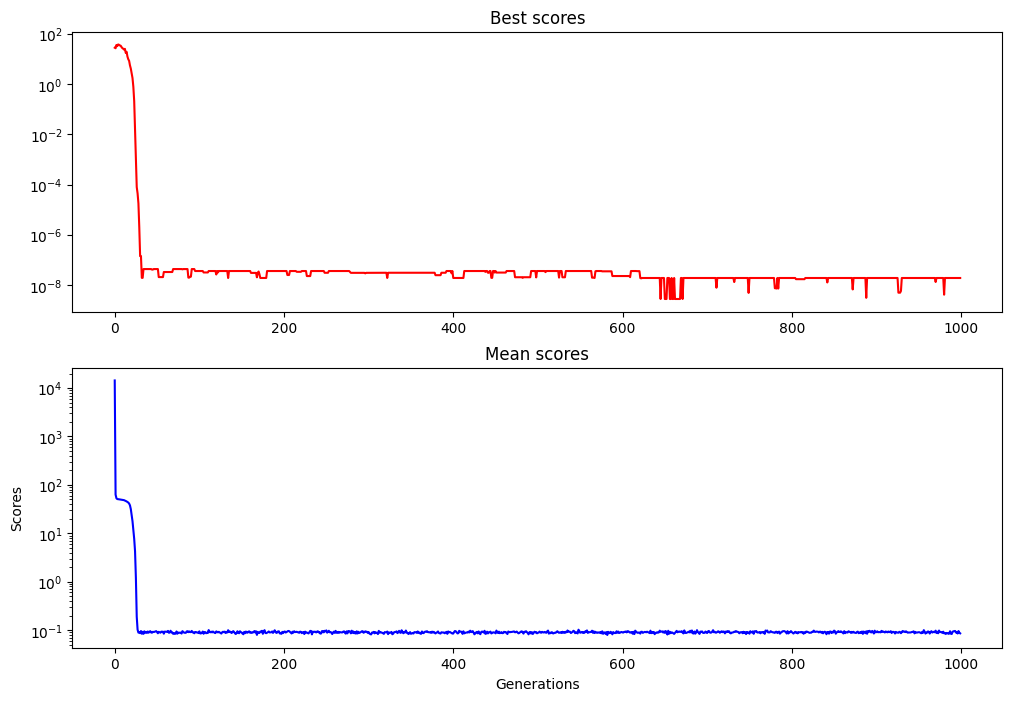

In [208]:
plot_scores(best_scores, mean_scores)

In [209]:
base_lenght = 1000
max_iter = 1000
pm = 0.0001
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 3.9628215164667164
Best solution: [-3.95512904 -3.5525411 ]
Simulating generation 200. This generation info:
Lowest score: 3.9628215164667164
Best solution: [-3.95512904 -3.5525411 ]
Simulating generation 300. This generation info:
Lowest score: 1.6580338658934841
Best solution: [-3.86364076 -3.47400392]
Simulating generation 400. This generation info:
Lowest score: 1.6580338658934841
Best solution: [-3.86364076 -3.47400392]
Simulating generation 500. This generation info:
Lowest score: 1.6580338658934841
Best solution: [-3.86364076 -3.47400392]
Simulating generation 600. This generation info:
Lowest score: 0.04608689389315403
Best solution: [-3.79969099 -3.31274699]
Simulating generation 700. This generation info:
Lowest score: 0.022675722237072007
Best solution: [-3.79969099 -3.28718155]
Simulating generation 800. This generation info:
Lowest score: 0.006001001323441184
Best solution: [-3.77067825 -3.28718155]
Simulating 

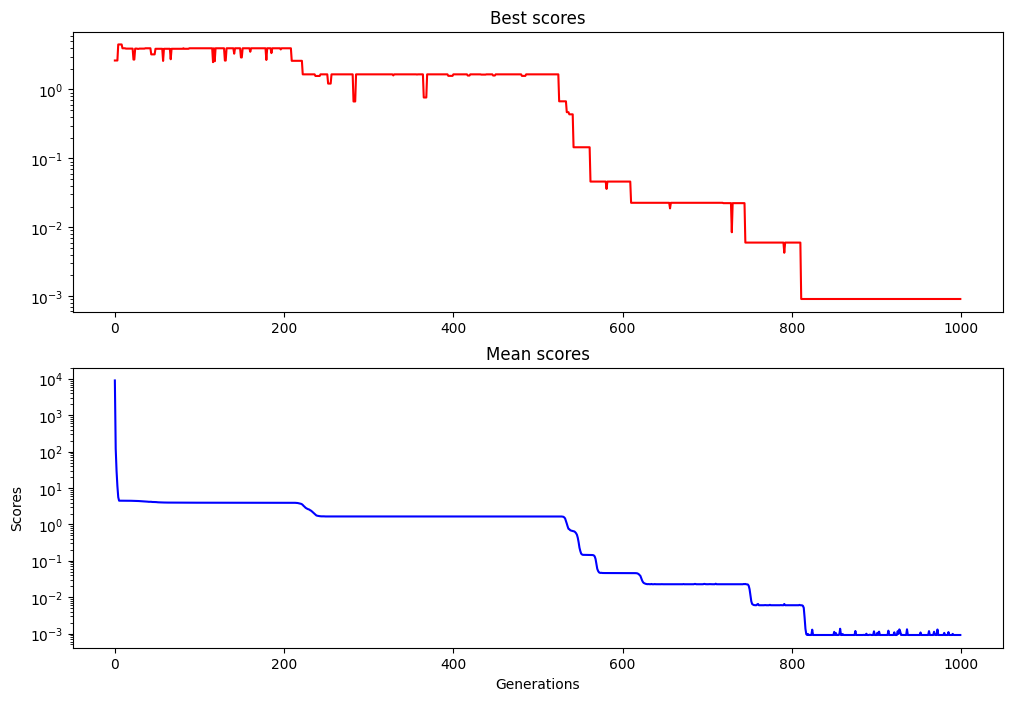

In [210]:
plot_scores(best_scores, mean_scores)

#### Different `pc` - probability of crossover

In [211]:
base_lenght = 1000
max_iter = 1000
pm = 0.01
pc = 1

solutions, best_scores, mean_scores = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 2.1740891741839464e-05
Best solution: [3.00075246 1.99906488]
Simulating generation 200. This generation info:
Lowest score: 9.183417320450511e-07
Best solution: [2.9998651  2.00022325]
Simulating generation 300. This generation info:
Lowest score: 9.183417320450511e-07
Best solution: [2.9998651  2.00022325]
Simulating generation 400. This generation info:
Lowest score: 9.183417320450511e-07
Best solution: [2.9998651  2.00022325]
Simulating generation 500. This generation info:
Lowest score: 9.183417320450511e-07
Best solution: [2.9998651  2.00022325]
Simulating generation 600. This generation info:
Lowest score: 7.126737346457794e-07
Best solution: [2.99993994 2.00022325]
Simulating generation 700. This generation info:
Lowest score: 5.536599344069635e-07
Best solution: [2.99993994 2.00019646]
Simulating generation 800. This generation info:
Lowest score: 1.432881466997254e-07
Best solution: [2.99993994 2.00007806]
Simulat

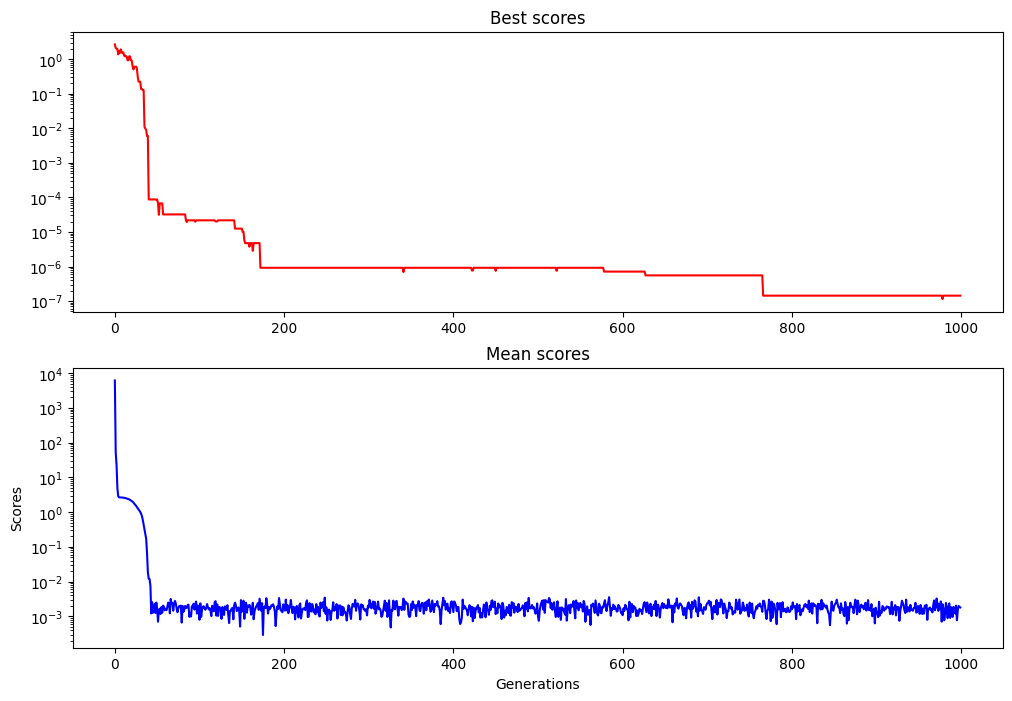

In [212]:
plot_scores(best_scores, mean_scores)

In [213]:
base_lenght = 1000
max_iter = 1000
pm = 0.01
pc = 0.01

solutions, best_scores, mean_scores = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 49.42637129569155
Best solution: [-2.89371894 -2.18307423]
Simulating generation 200. This generation info:
Lowest score: 25.369944602833172
Best solution: [-3.13940967 -2.60249241]
Simulating generation 300. This generation info:
Lowest score: 5.644874436075166
Best solution: [-3.66350071 -2.88680943]
Simulating generation 400. This generation info:
Lowest score: 4.139816099936453e-05
Best solution: [-3.77853127 -3.28338508]
Simulating generation 500. This generation info:
Lowest score: 4.3899122005879115e-06
Best solution: [-3.77957719 -3.28338508]
Simulating generation 600. This generation info:
Lowest score: 1.6885968275693813e-06
Best solution: [-3.77939476 -3.28338508]
Simulating generation 700. This generation info:
Lowest score: 4.2680837214267287e-07
Best solution: [-3.77939476 -3.28318149]
Simulating generation 800. This generation info:
Lowest score: 4.2680837214267287e-07
Best solution: [-3.77939476 -3.28318149]

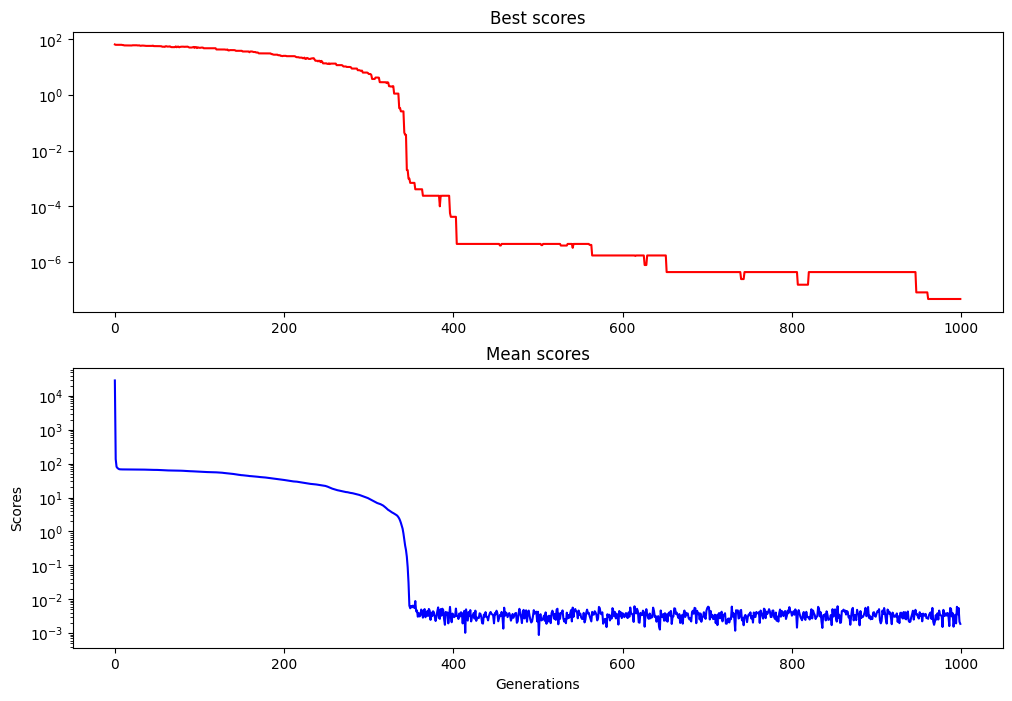

In [214]:
plot_scores(best_scores, mean_scores)

### 3.2 Ackley's function

#### Default parameters

In [215]:
base_lenght = 1000
max_iter = 1000
pm = 0.01
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 0.00034418900027377575
Best solution: [-1.00617867e-04  6.81943548e-05]
Simulating generation 200. This generation info:
Lowest score: 0.0002998551430022367
Best solution: [-1.00617867e-04  3.30575833e-05]
Simulating generation 300. This generation info:
Lowest score: 0.0002998551430022367
Best solution: [-1.00617867e-04  3.30575833e-05]
Simulating generation 400. This generation info:
Lowest score: 9.432140166554248e-05
Best solution: [-4.30863194e-06  3.30575833e-05]
Simulating generation 500. This generation info:
Lowest score: 9.432140166554248e-05
Best solution: [-4.30863194e-06  3.30575833e-05]
Simulating generation 600. This generation info:
Lowest score: 9.432140166554248e-05
Best solution: [-4.30863194e-06  3.30575833e-05]
Simulating generation 700. This generation info:
Lowest score: 9.432140166554248e-05
Best solution: [-4.30863194e-06  3.30575833e-05]
Simulating generation 800. This generation info:
Lowest score

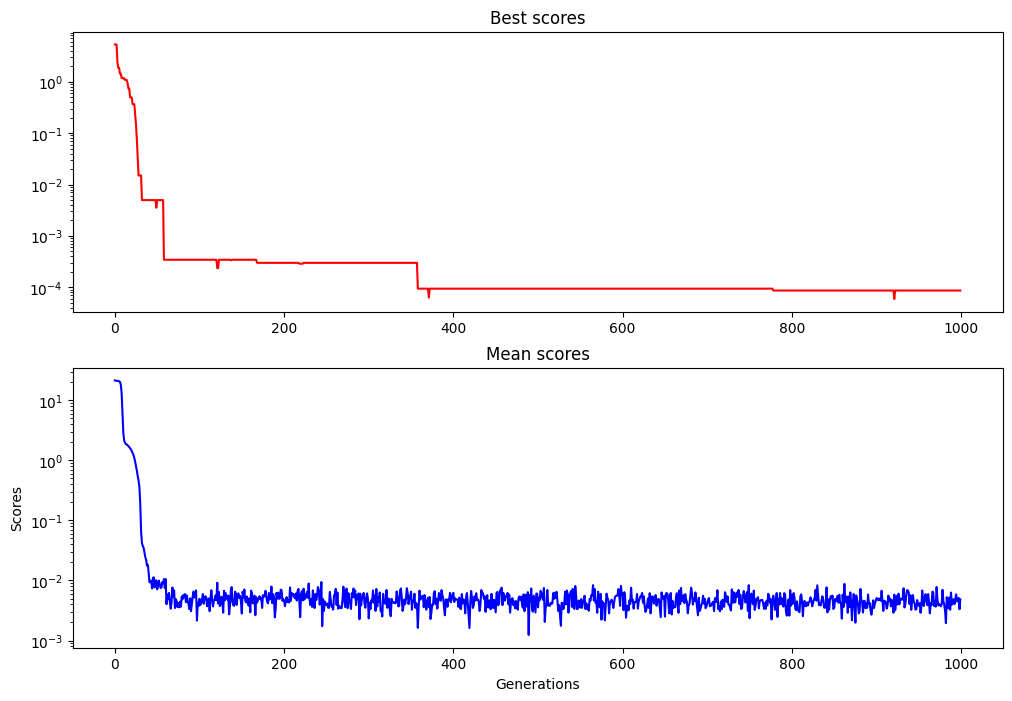

In [216]:
plot_scores(best_scores, mean_scores)

#### Different `base_length`

In [217]:
base_lenght = 10000
max_iter = 1000
pm = 0.01
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 8.062009525788838e-05
Best solution: [ 1.22338638e-05 -2.57360992e-05]
Simulating generation 200. This generation info:
Lowest score: 2.736912964040883e-05
Best solution: [-2.78736685e-07 -9.67155142e-06]
Simulating generation 300. This generation info:
Lowest score: 2.736912964040883e-05
Best solution: [-2.78736685e-07 -9.67155142e-06]
Simulating generation 400. This generation info:
Lowest score: 2.736912964040883e-05
Best solution: [-2.78736685e-07 -9.67155142e-06]
Simulating generation 500. This generation info:
Lowest score: 2.3193794142617463e-05
Best solution: [-2.78736685e-07  8.19487254e-06]
Simulating generation 600. This generation info:
Lowest score: 2.3193794142617463e-05
Best solution: [-2.78736685e-07  8.19487254e-06]
Simulating generation 700. This generation info:
Lowest score: 1.0090359044756525e-05
Best solution: [-2.78736685e-07 -3.55645459e-06]
Simulating generation 800. This generation info:
Lowest sco

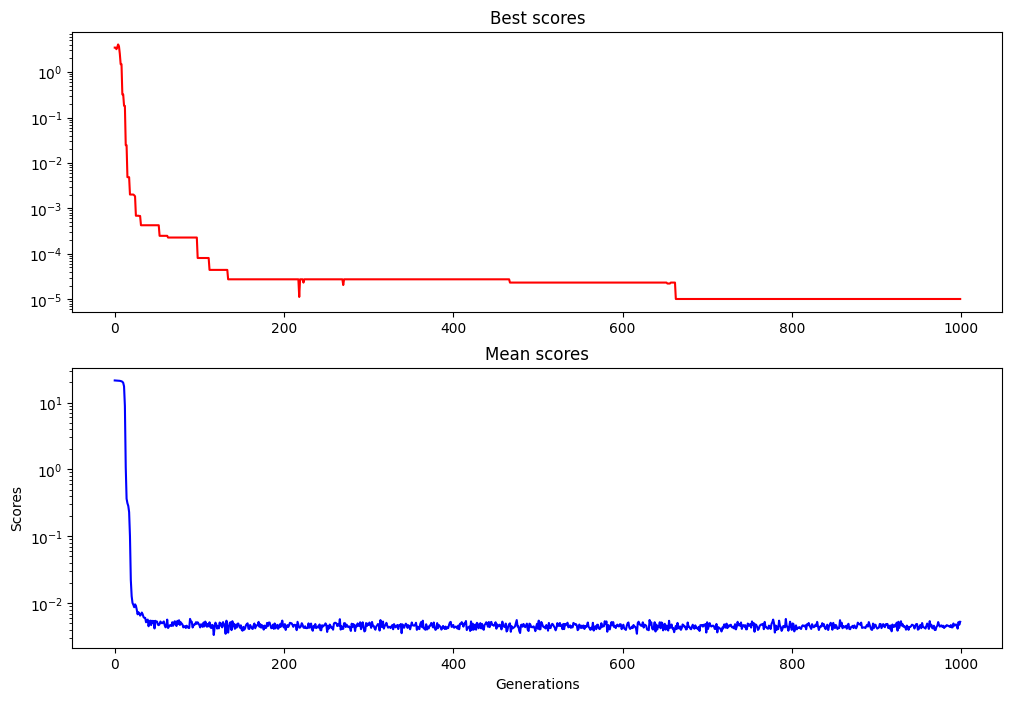

In [218]:
plot_scores(best_scores, mean_scores)

In [219]:
base_lenght = 100
max_iter = 1000
pm = 0.01
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 20.01168766772941
Best solution: [97.99730846 82.97926456]
Simulating generation 200. This generation info:
Lowest score: 20.00088528233859
Best solution: [97.99730846 82.99492348]
Simulating generation 300. This generation info:
Lowest score: 20.00551386471239
Best solution: [97.99730846 82.98590647]
Simulating generation 400. This generation info:
Lowest score: 20.11864849735266
Best solution: [98.0677001  82.99729381]
Simulating generation 500. This generation info:
Lowest score: 20.032529444480513
Best solution: [98.01026015 82.966553  ]
Simulating generation 600. This generation info:
Lowest score: 20.01240733763667
Best solution: [97.98749484 83.01753715]
Simulating generation 700. This generation info:
Lowest score: 20.03929913488902
Best solution: [98.0072787  83.03780575]
Simulating generation 800. This generation info:
Lowest score: 20.01915497675405
Best solution: [97.97661543 82.98693247]
Simulating generation 9

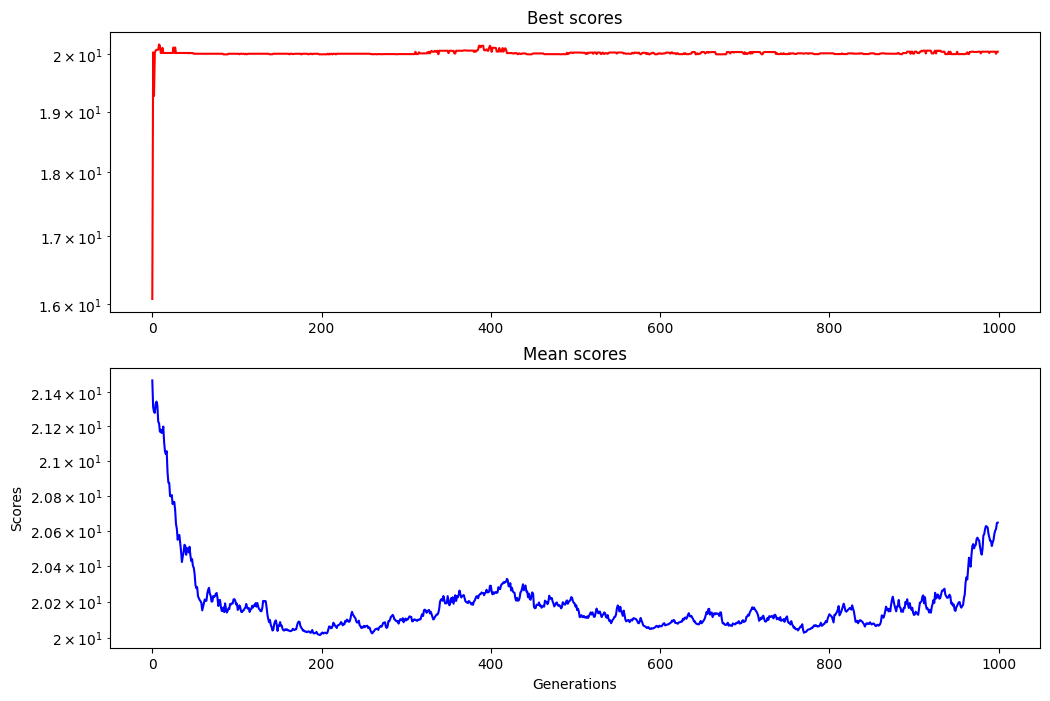

In [220]:
plot_scores(best_scores, mean_scores)

#### Different `max_iter`

In [221]:
base_lenght = 1000
max_iter = 10000
pm = 0.01
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc)

Simulating generation 1000. This generation info:
Lowest score: 6.53991108068297e-06
Best solution: [1.02919306e-06 2.07046698e-06]
Simulating generation 2000. This generation info:
Lowest score: 6.53991108068297e-06
Best solution: [1.02919306e-06 2.07046698e-06]
Simulating generation 3000. This generation info:
Lowest score: 6.53991108068297e-06
Best solution: [1.02919306e-06 2.07046698e-06]
Simulating generation 4000. This generation info:
Lowest score: 6.53991108068297e-06
Best solution: [1.02919306e-06 2.07046698e-06]
Simulating generation 5000. This generation info:
Lowest score: 6.53991108068297e-06
Best solution: [1.02919306e-06 2.07046698e-06]
Simulating generation 6000. This generation info:
Lowest score: 6.53991108068297e-06
Best solution: [1.02919306e-06 2.07046698e-06]
Simulating generation 7000. This generation info:
Lowest score: 6.53991108068297e-06
Best solution: [1.02919306e-06 2.07046698e-06]
Simulating generation 8000. This generation info:
Lowest score: 2.9401261625

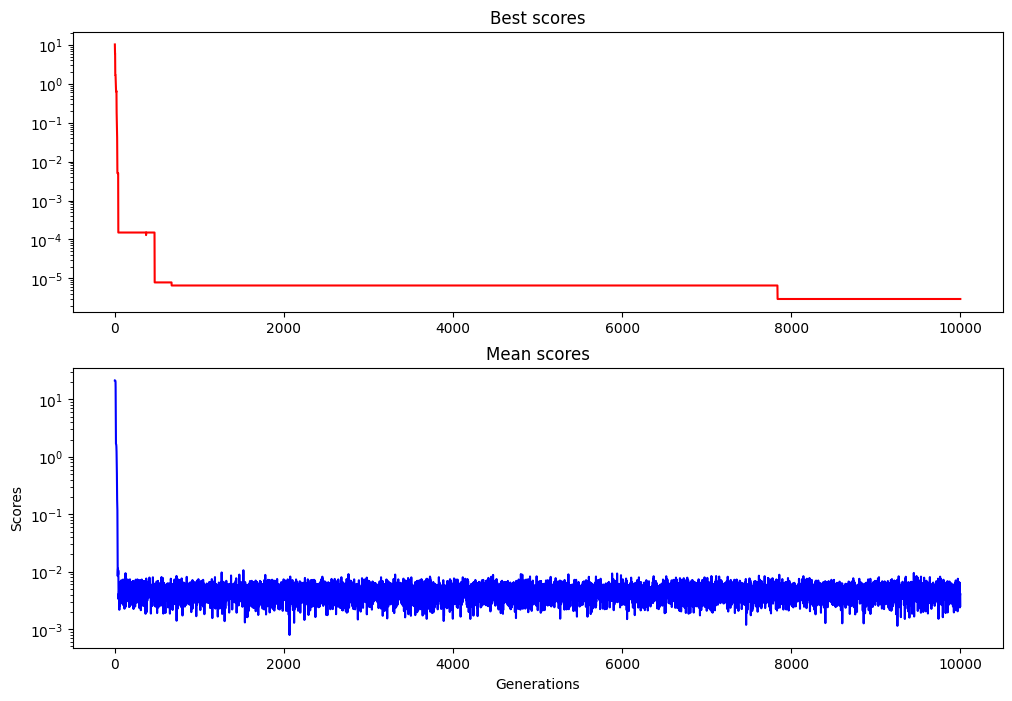

In [222]:
plot_scores(best_scores, mean_scores)

In [223]:
base_lenght = 1000
max_iter = 100
pm = 0.01
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc)

Simulating generation 10. This generation info:
Lowest score: 9.141707587288188
Best solution: [-0.14782641  4.00160789]
Simulating generation 20. This generation info:
Lowest score: 7.508517304164281
Best solution: [-0.14782641 -2.86579465]
Simulating generation 30. This generation info:
Lowest score: 7.146292978092269
Best solution: [-0.05284948 -2.86579465]
Simulating generation 40. This generation info:
Lowest score: 7.164602604621617
Best solution: [-0.06025554 -2.86579465]
Simulating generation 50. This generation info:
Lowest score: 6.972799582243123
Best solution: [-0.04953578 -2.93041885]
Simulating generation 60. This generation info:
Lowest score: 6.965604363341642
Best solution: [-0.05620192 -2.95895609]
Simulating generation 70. This generation info:
Lowest score: 6.911103757225842
Best solution: [-0.03100622 -2.95329366]
Simulating generation 80. This generation info:
Lowest score: 6.9675856088094985
Best solution: [-0.05620192 -2.95329366]
Simulating generation 90. This 

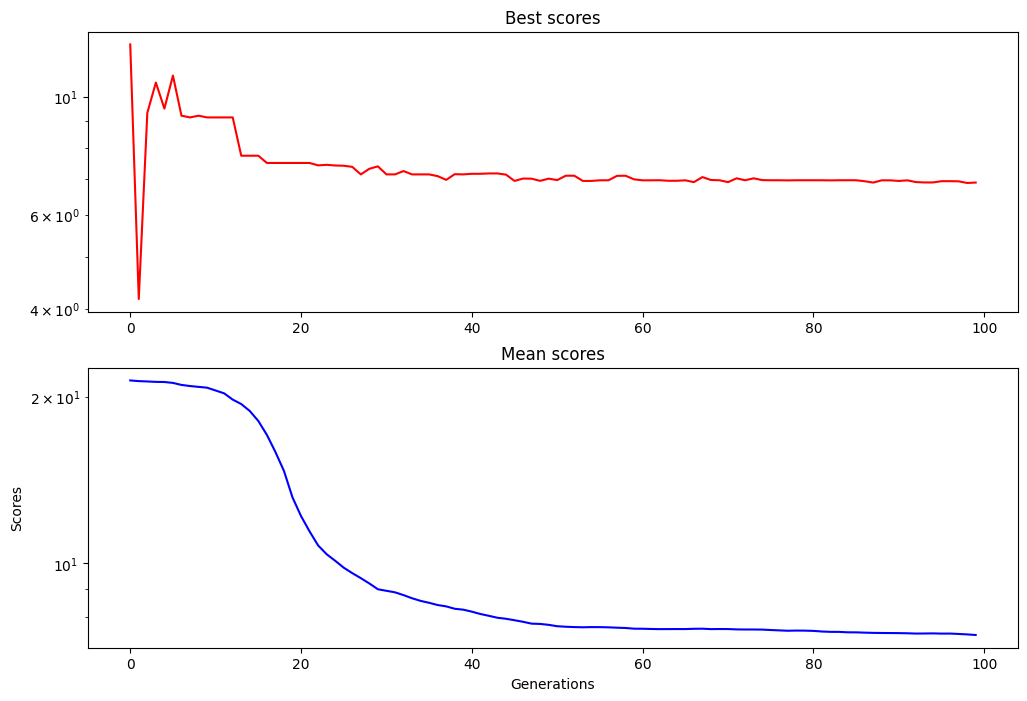

In [224]:
plot_scores(best_scores, mean_scores)

#### Different `pm`

In [225]:
base_lenght = 1000
max_iter = 1000
pm = 0.5
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 1.7598944918706394e-05
Best solution: [6.17016532e-06 7.99926627e-07]
Simulating generation 200. This generation info:
Lowest score: 1.3493714007939417e-05
Best solution: [-4.70298978e-06  7.99926627e-07]
Simulating generation 300. This generation info:
Lowest score: 9.149307402811502e-06
Best solution: [3.13419980e-06 7.99926627e-07]
Simulating generation 400. This generation info:
Lowest score: 9.149307402811502e-06
Best solution: [3.13419980e-06 7.99926627e-07]
Simulating generation 500. This generation info:
Lowest score: 5.551621651722627e-06
Best solution: [-1.79235540e-06  7.99926627e-07]
Simulating generation 600. This generation info:
Lowest score: 5.551621651722627e-06
Best solution: [-1.79235540e-06  7.99926627e-07]
Simulating generation 700. This generation info:
Lowest score: 5.551621651722627e-06
Best solution: [-1.79235540e-06  7.99926627e-07]
Simulating generation 800. This generation info:
Lowest score: 5.5

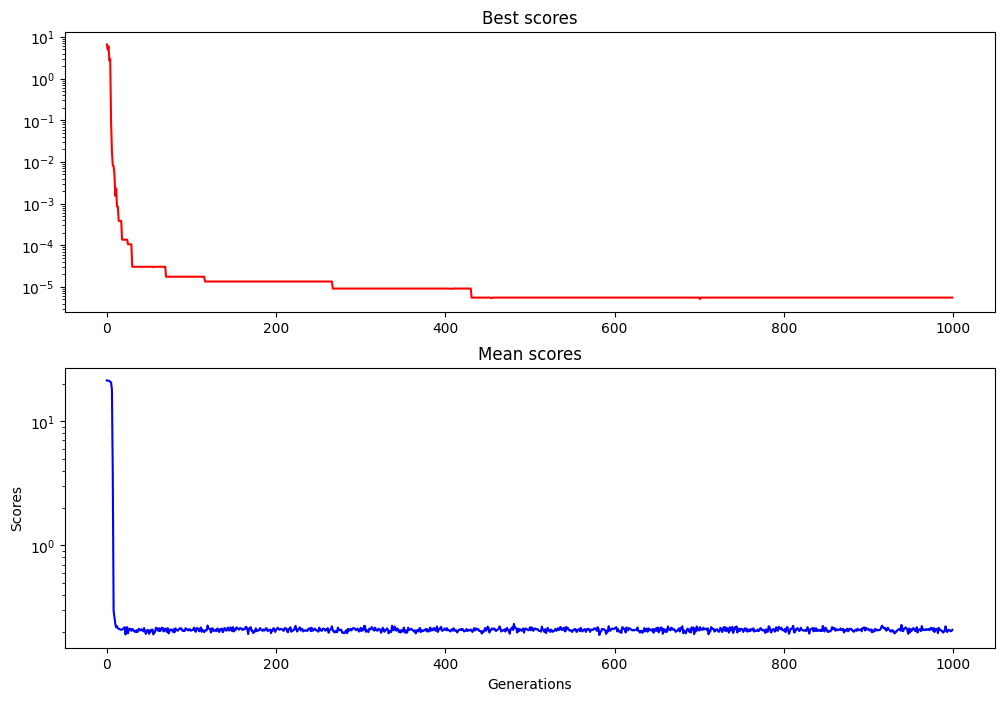

In [226]:
plot_scores(best_scores, mean_scores)

In [227]:
base_lenght = 1000
max_iter = 1000
pm = 0.001
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 0.007659190378352054
Best solution: [0.00173431 0.00199335]
Simulating generation 200. This generation info:
Lowest score: 0.004075798469703518
Best solution: [-0.00036832  0.00137345]
Simulating generation 300. This generation info:
Lowest score: 0.005098490016959278
Best solution: [0.00112123 0.00137345]
Simulating generation 400. This generation info:
Lowest score: 0.003487868617096712
Best solution: [ 0.00112123 -0.00047874]
Simulating generation 500. This generation info:
Lowest score: 0.003487868617096712
Best solution: [ 0.00112123 -0.00047874]
Simulating generation 600. This generation info:
Lowest score: 0.0021109540989283637
Best solution: [ 0.0005658  -0.00047874]
Simulating generation 700. This generation info:
Lowest score: 0.0021109540989283637
Best solution: [ 0.0005658  -0.00047874]
Simulating generation 800. This generation info:
Lowest score: 0.0014095520439885156
Best solution: [ 0.00012985 -0.00047874]
S

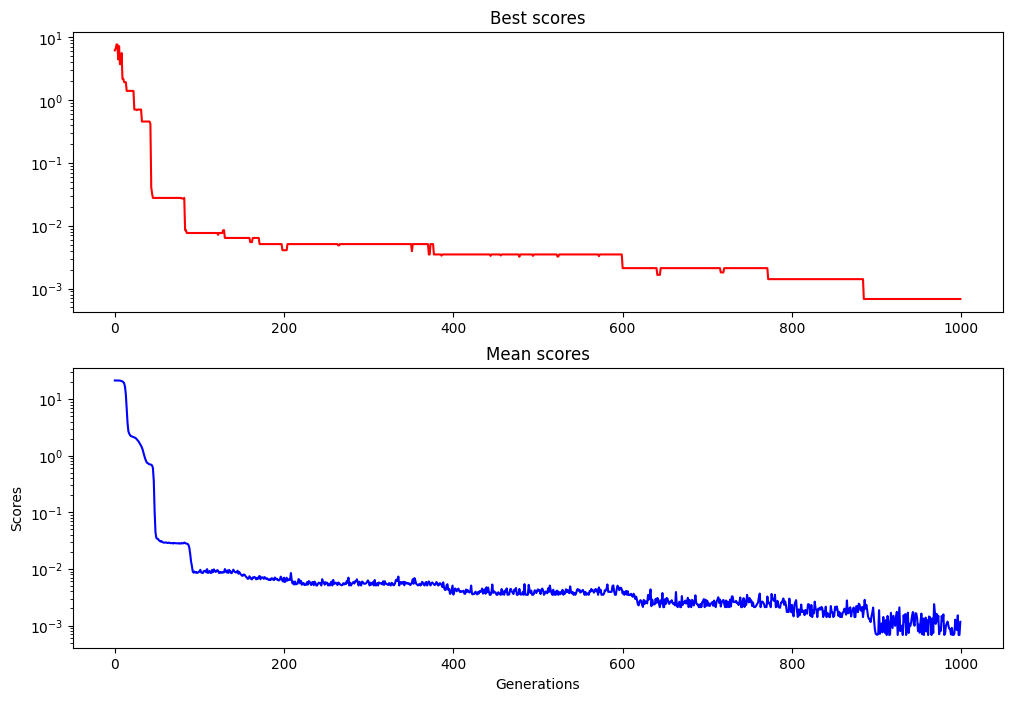

In [228]:
plot_scores(best_scores, mean_scores)

#### Different `pc`

In [229]:
base_lenght = 1000
max_iter = 1000
pm = 0.01
pc = 1

solutions, best_scores, mean_scores = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 8.759738669938955e-05
Best solution: [-1.00746479e-05  2.92763610e-05]
Simulating generation 200. This generation info:
Lowest score: 8.759738669938955e-05
Best solution: [-1.00746479e-05  2.92763610e-05]
Simulating generation 300. This generation info:
Lowest score: 8.759738669938955e-05
Best solution: [-1.00746479e-05  2.92763610e-05]
Simulating generation 400. This generation info:
Lowest score: 8.759738669938955e-05
Best solution: [-1.00746479e-05  2.92763610e-05]
Simulating generation 500. This generation info:
Lowest score: 8.759738669938955e-05
Best solution: [-1.00746479e-05  2.92763610e-05]
Simulating generation 600. This generation info:
Lowest score: 8.759738669938955e-05
Best solution: [-1.00746479e-05  2.92763610e-05]
Simulating generation 700. This generation info:
Lowest score: 8.759738669938955e-05
Best solution: [-1.00746479e-05  2.92763610e-05]
Simulating generation 800. This generation info:
Lowest score:

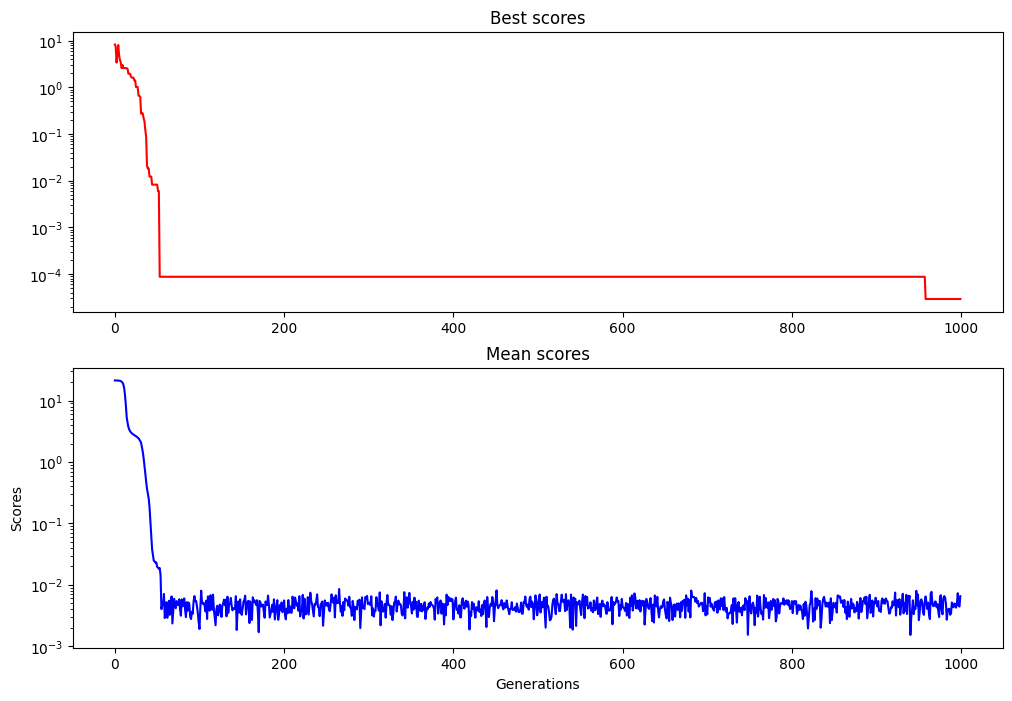

In [230]:
plot_scores(best_scores, mean_scores)

In [231]:
base_lenght = 1000
max_iter = 1000
pm = 0.01
pc = 0.01

solutions, best_scores, mean_scores = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 0.016298639783567825
Best solution: [5.47947384e-03 6.03736328e-05]
Simulating generation 200. This generation info:
Lowest score: 0.0008462889993663403
Best solution: [2.92198239e-04 6.03736328e-05]
Simulating generation 300. This generation info:
Lowest score: 0.000536909904593319
Best solution: [1.79613009e-04 6.03736328e-05]
Simulating generation 400. This generation info:
Lowest score: 0.000319071763890566
Best solution: [-9.51520572e-05  6.03736328e-05]
Simulating generation 500. This generation info:
Lowest score: 0.000319071763890566
Best solution: [-9.51520572e-05  6.03736328e-05]
Simulating generation 600. This generation info:
Lowest score: 0.000319071763890566
Best solution: [-9.51520572e-05  6.03736328e-05]
Simulating generation 700. This generation info:
Lowest score: 0.000319071763890566
Best solution: [-9.51520572e-05  6.03736328e-05]
Simulating generation 800. This generation info:
Lowest score: 0.000270272

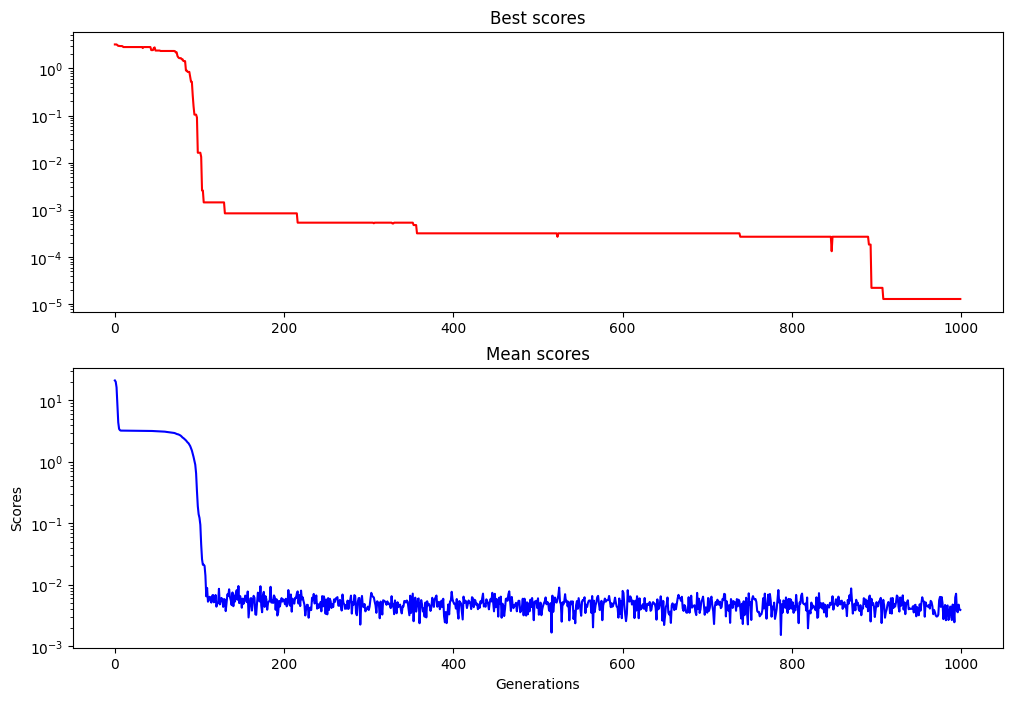

In [232]:
plot_scores(best_scores, mean_scores)

## 4. Conclusions

Evolutionary algorithm is better at finding global minimmum of a given function than simple gradient. However the solution it gives, highly depends on starting parameters:
- `base_lenght`: Base population length. The larger it is the slower algorithm works but it has higher chances for a better solutions. It needs to be picked adequatly for amount of computation we have at our disposal and how precise solution we expect.
- `max_iter`: The maximum amount of iterations algorithm can achieve. Similarly to `base_length` the bigger it is the slower algorithm works. However, in my implementation, the limit of iterations is rarely hit because of additional stop condition.
- `pm`: Probability of mutation. It indicates how often a gen is mutated. It has to be quite close to 0 because mutations can highly impact the output data. If it is too large the solution could be a random number and algorithm is most likely to end due to max iterations limit.
- `pc`: Probability of crossover. Similarly, it tells how often crossover is performed. However this can, and should, be closer to 1 than 0, because it positively affects a search for solution. It could even be ecqual to 1 so crossover happens everytime.